# Preprocess phage per phage LMM results 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from statsmodels.stats.multitest import multipletests

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 15

pd.set_option('display.precision', 2)

sns.set_style("ticks")
np.random.seed(0)

In [2]:
results_dir = "results/AF_niter=500000_minfreq=8"

all_res = []
for res_path in os.listdir(results_dir):
    if "__" in res_path:
        phage = res_path.split("__")[0]
        res_df = pd.read_csv(results_dir + "/" + res_path, sep="\t", header=0, names=["feature", "post_mean", "cred_interval_low", "cred_interval_high", "sample_size", "pMCMC"]).dropna()
        
        res_df["phage"] = phage
        res_df = res_df.loc[~res_df["feature"].isna()].sort_values("pMCMC")  # sort p-values for BH correction

        res_df["significance"] = res_df["pMCMC"] < 1e-3

        all_res.append(res_df)
all_res = pd.concat(all_res, axis=0).set_index("phage").reset_index()

print("#Significant hits:", all_res.loc[all_res["significance"]].shape[0])

all_res

do_save_cat_results = False
if do_save_cat_results:
    res_df = pd.read_csv("results/test.tsv", sep="\t")
    rej, pval_corr, _, _ = multipletests(res_df["pMCMC"].values, alpha=0.05, method="sh")
    pval_corr

#Significant hits: 27


In [3]:
signif_alpha = 1e-2
signif_hits = all_res.loc[all_res["pMCMC"] < signif_alpha]

signif_hits["feature_category"] = signif_hits["feature"].apply(lambda x: x[:-2] if not x.endswith("TRUE") else x[:-4]).replace({"OMPA99_": "OMPA", "O.type": "O-type", "MazEF": "Defense system"})
signif_hits["af_vs_ds"] = signif_hits["feature"].apply(lambda x: "Adsorption factor" if (x.startswith("LPS") or x.startswith("OMP") or x.startswith("ABC") or x.startswith("O.type") or x.startswith("Klebs")) else "Defense system")

signif_hits[:20]

/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/205021637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signif_hits["feature_category"] = signif_hits["feature"].apply(lambda x: x[:-2] if not x.endswith("TRUE") else x[:-4]).replace({"OMPA99_": "OMPA", "O.type": "O-type", "MazEF": "Defense system"})
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/205021637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signif_hits["af_vs_ds"] = signif_hits["feature"].apply(lambda x

,phage,feature,post_mean,cred_interval_low,cred_interval_high,sample_size,pMCMC,significance,feature_category,af_vs_ds
109,AL505_Ev3,YNCDOther,-189080.13,-315424.00,-84055.55,1800.00,5.56e-04,True,YNCDOth,Defense system
110,AL505_Ev3,OMPA99_16,283921.09,158392.94,394631.98,1926.76,5.56e-04,True,OMPA,Adsorption factor
327,LF82_P4,LPS_typeR1,255910.82,138306.68,370389.72,1800.00,5.56e-04,True,LPS_type,Adsorption factor
328,LF82_P4,LPS_typeR4,287823.22,146553.26,436471.85,1800.00,5.56e-04,True,LPS_type,Adsorption factor
329,LF82_P4,LPS_typeR3,-192487.23,-338306.56,-49002.20,1679.29,6.67e-03,False,LPS_type,Adsorption factor
545,X416_P4,ABC_serotypeK5,309578.55,192970.06,431405.72,1580.23,5.56e-04,True,ABC_serotype,Adsorption factor
546,X416_P4,ABC_serotypeNA,-198851.21,-346351.67,-61681.45,690.68,3.33e-03,False,ABC_serotype,Adsorption factor
872,NRG_11B1,LPS_typeR4,203203.64,55555.76,350967.67,1800.00,5.56e-03,False,LPS_type,Adsorption factor
981,AN17_P1,ABC_serotypeK5,236796.94,76656.16,390139.59,1973.43,6.67e-03,False,ABC_serotype,Adsorption factor
1308,LF110_P1,LPS_typeR4,226895.18,86149.24,372939.88,1990.45,5.56e-04,True,LPS_type,Adsorption factor


/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/4197905640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/4197905640.py:3: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/4197905640.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")


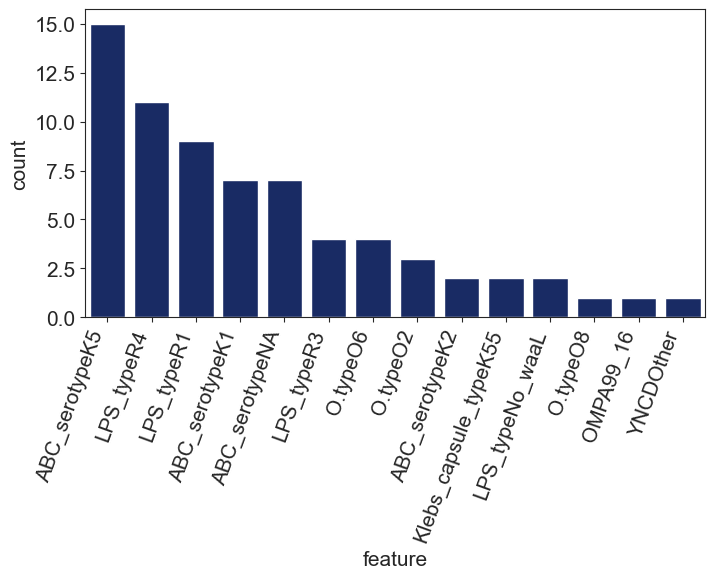

In [4]:
# results per feature
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_per_feature.svg")

In [5]:
# signif_hits.to_csv("C:/Users/hvays/These/projects/coli/manuscript/source_data/Figure_4/Figure_4_B.tsv", sep="\t", index=False)

/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/2943787742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signif_hits.value_counts("feature_category").reset_index(), x="feature_category", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/2943787742.py:3: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=signif_hits.value_counts("feature_category").reset_index(), x="feature_category", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/2943787742.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(

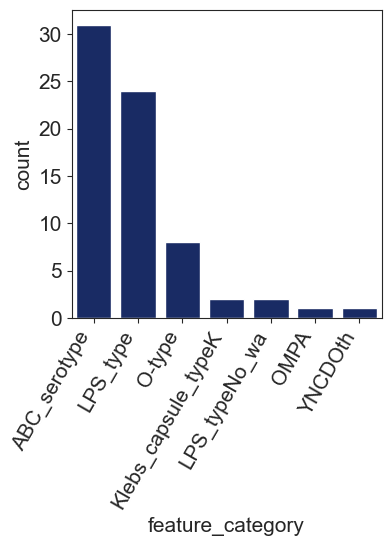

In [6]:
# results per feature category
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.barplot(data=signif_hits.value_counts("feature_category").reset_index(), x="feature_category", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_per_category.svg")

/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/3117182428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/3117182428.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
/var/folders/cz/4k6wq6y95zv1bmpp7n889ttr0000gn/T/ipykernel_79748/3117182428.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")


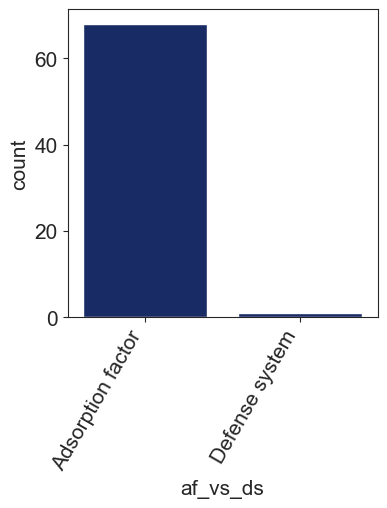

In [7]:
# results per AF vs. DS
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_af_vs_ds.svg")

In [8]:
# signif_hits.value_counts("af_vs_ds").reset_index().to_csv("C:/Users/hvays/These/projects/coli/manuscript/source_data/Figure_4/Figure_4_A.tsv", sep="\t", index=False)